# 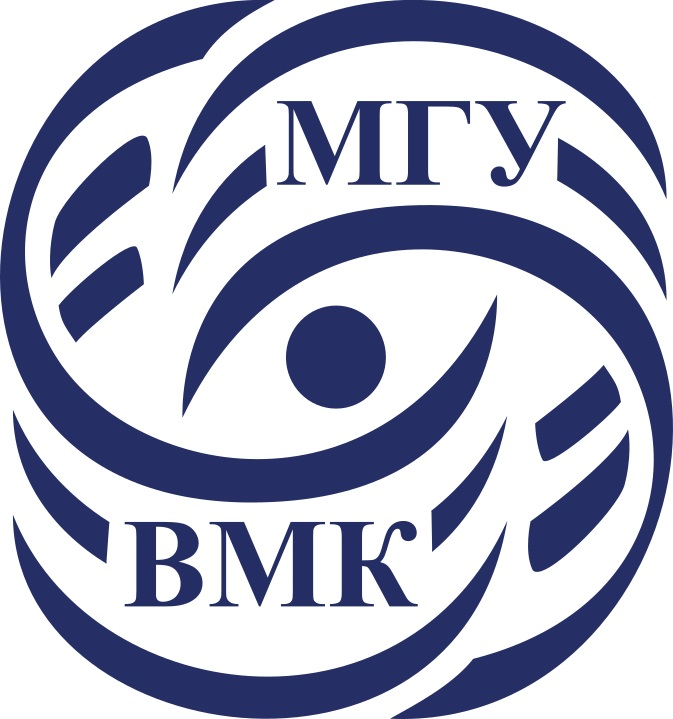

# Машинное обучение. ВМК МГУ

# Практическое задание 2. Knn: классификация и регрессия

## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>







<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 10 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)

In [2]:
! curl https://raw.githubusercontent.com/MSU-ML-COURSE/ML-COURSE-25-26/refs/heads/master/requirements/requirements.txt -o ./requirements_2025_26_for_colab_small.txt
! pip install -q -r ./requirements_2025_26_for_colab_small.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   360  100   360    0     0   2620      0 --:--:-- --:--:-- --:--:--  2627


Проверим версию библиотеки:

In [3]:
import catboost
assert(catboost.__version__ == '1.2.8')


<font color='OrangeRed'>**Внимание!**</font> Перед выполнение данного задания рекомендуем сначала погрузиться в [Base] ноутбук по основам sklearn, нормализации и кросс-валидации, так как данные техники и понятия будут активно использоваться в данном ноутбук

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

# Часть 1. Нормализация признакового пространства

В данном части задания исследуем, как нормализация (скейлинг) данных влияет на разделимость данных

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt


plt.rcParams["figure.figsize"] = (5,5)

Загрузим файл с данными data.pkl:

In [6]:
!gdown 1acbP4PNmu11rkBzozvIc3bowWaQL7iFe

Downloading...
From: https://drive.google.com/uc?id=1acbP4PNmu11rkBzozvIc3bowWaQL7iFe
To: /content/data.pkl
100% 5.03k/5.03k [00:00<00:00, 11.8MB/s]


Загрузим данные в память. В переменной $X$ будут храниться признаковые описания объектов, в переменной $y~-$ метки классов

In [7]:
with open('/content/data.pkl', 'rb') as file:
    X, y = pickle.load(file)

In [8]:
def plot_data_points(X, labels, xlim, ylim):
    g = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
    g.set(xlim=xlim, ylim=ylim)
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.grid()

Визуализируем наши данные

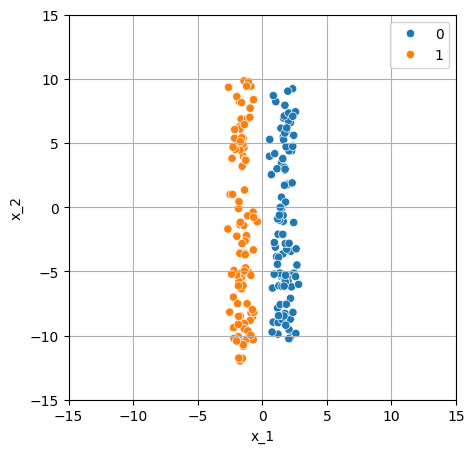

In [9]:
plot_data_points(X, y, xlim=(-15, 15), ylim=(-15, 15))

Как видно, наши данные идеально разделяются прямой $x=0$

Функция $plot\_knn\_bound$ принимает на вход объекты $X$, метки классов $y$, метод нормализации признаков $scaler$, число соседей $n\_neighbors$ и границы рисунка $xlim$, $ylim$. Функция обучает $KNN$ классификатор с числом соседей $n\_neighbors$ и визуализирует разделяющую поверхность для классов, полученную с помощью обученного $KNN$ классификатора.

* Если вы не можете различить _выбранные нами цвета_, то измените список цветов в переменных cmap_light и cmap_bold. Актуальный список возможных цветов находится [здесь](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [10]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def plot_knn_bound(X, y, scaler=None, n_neighbors=10, xlim=(-15, 15), ylim=(-20, 20)):
    # step size in the mesh
    h = 0.05

    # Create color maps
    cmap_light = ListedColormap(['C0', 'orange', 'cyan', 'green'][:np.unique(y).shape[0]])
    cmap_bold = ['C0', 'orange', 'c', 'darkgreen'][:np.unique(y).shape[0]]

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    X_scaled = X # if scaler is None
    if scaler is not None:
        grid = scaler.transform(grid)
        X_scaled = scaler.transform(X)

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm='brute')
    clf.fit(X_scaled, y)

    Z = clf.predict(grid)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.title('Разделющие поверхности алгоритма {}-NN'.format(n_neighbors))
    plt.grid()
    plt.show()

Нарисуем разделющие поверхности $1$-$NN$ и $10$-$NN$

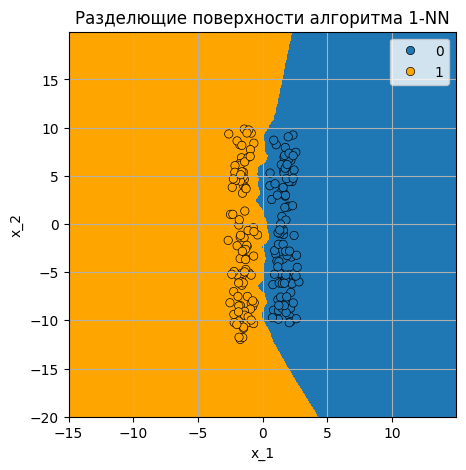

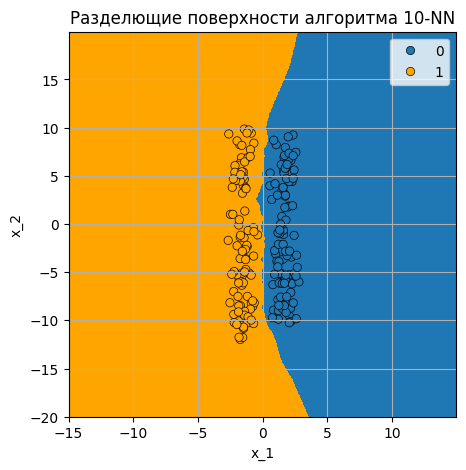

In [11]:
plot_knn_bound(X, y, n_neighbors=1)
plot_knn_bound(X, y, n_neighbors=10)

## <font color='DarkOrange'>**Задание 1.1 (кросс-проверка, 1,5 балла)**</font>

 Объясните, почему наблюдается сильное отклоенние разделяющей поверхности от прямой $x_1=0$ при значениях $x_2 < -10$ и $x_2 > 10$. Дайте <font color='OrangeRed'>**строгое математическое обоснование**</font> наблюдаемого явления, показывающее, что в Евклидовом пространстве данная проблема решается нормализацией (скейлингом) признаков.

<font color='MediumOrchid'>**Ваше обоснование тут, можно использовать LaTeX:**</font>

##Проблема
Мы видим, что в центре графика (при x_2 между -10 и 10) разделяющая поверхность близка к вертикальной прямой. Однако при x_2 < -10 и x_2 > 10 граница сильно отклоняется от вертикали.

Я думаю, что это объясняется тем, что классификация объекта в этих областях определяется в первую очередь по признаку x_2, а не по x_1.

Так как:
1) формула **Евклидова** расстояния остается прежней:
$d(P, Q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2}$

2) Разброс признака `x_2` (22 единицы) примерно в 3.7 раза больше разброса `x_1` (6 единиц). Это означает, что максимально возможный вклад $(x_2^p - x_2^q)^2$ может быть примерно в 13.7 раз больше максимального вклада $(x_1^p - x_1^q)^2$  ($(\frac{22}{6})^2 ≈ 13.4$).

Таким образом, вклад слагаемого $(x_2^p - x_2^q)^2$ начинает **преобладать в общей сумме**.

И это преобладание приводит к тому, что при поиске ближайшего соседа для точки в верхней или нижней части графика (где |x_2| велико), разница в значениях `x_2` становится настолько значимой, что **"перевешивает"** любую разницу в `x_1`.

Алгоритм будет считать ближайшими те объекты, у которых значение `x_2` близко к целевому, даже если их `x_1` сильно отличаются. Именно это и заставляет разделяющую поверхность отклоняться от вертикали по краям.

##Решение

Решением как раз является скейлинг, так как когда мы нормализуем разброс значений признаков `x_1` и `x_2`, то преобладание слагаемого $(x_2^p - x_2^q)^2$ в Евклидовой метрике уйдет.

---

## <font color='DarkOrange'>**Задание 1.2 (кросс-проверка, 2 балла)**</font>


 Пусть дано произвольное число точек на плоскости. Представим, что каждая точка - это отдельный класс. Пусть на данной выборке был обучен $1-NN$ классификатор. Чем с геометрической точки зрения являются разделяющие поверхности этого классификатора? Требуется <font color='OrangeRed'>**математически строго, однозначно и с полным обоснованием**</font> определить геометрическое место точек разделяющих поверхностей.

В качестве примера ниже представлена визуализация для четырех точек

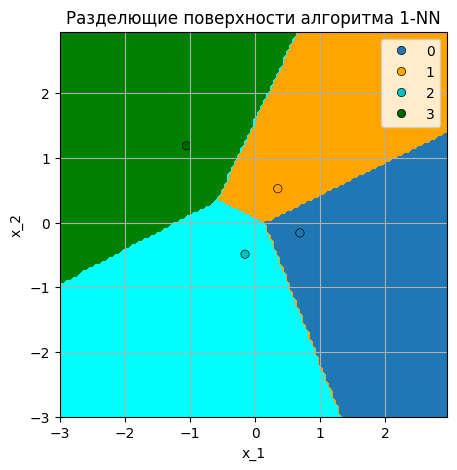

In [12]:
X = np.random.randn(4, 2)
y = np.arange(4)
plot_knn_bound(X, y, n_neighbors=1, xlim=(-3, 3), ylim=(-3, 3))

<font color='MediumOrchid'>**Ваше обоснование тут, можно использовать LaTeX:**</font>

Разделяющие поверхности это **серединные перпендикуляры** к отрезкам между этими точками.

Так как у нас в каждом классе только по 1 точке, то формула разделяющей поверхности между классами будет зависеть только от расстояния между этими 2-мя точками.

Формула расстояния между двумя точками по **Евклидовой** метрике:
$d = \sqrt{(x_2-x_1)^2 + (y_2 - y_1)^2}$

Пусть у нас есть две наши точки $A(x₁,y₁)$ и $B(x₂,y₂)$, принадлежащие разным классам, тогда серединный перпендикуляр между ними задается формулой:

$\sqrt{(x-x_1)^2 + (y - y_1)^2}= \sqrt{(x-x_2)^2 + (y - y_2)^2}$

Возводя обе части в квадрат получаем:

$(x-x_1)^2 + (y - y_1)^2 = (x-x_2)^2 + (y - y_2)^2$

# Часть 2. Кросс-валидация

Чтобы закрепить понимание устройства кросс-валидации предлагаем вам запрограммировать данный метод самостоятельно

## <font color='DarkOrange'>**Задание 2.1 (unit-tests, 3 балла)**</font>

 В модуле `cross_val.py` реализуйте функции

* $kfold\_split$, которая реализует генерацию индексов обучающей и валидационной выборок для кросс-валидации
* $knn\_cv\_score$, которая реализует кросс-валидацию для $KNN-$модели
   
Примеры запусков функций можно увидеть в открытых тестах.

----

# Часть 3. Работа с текстовыми данными

Далее будем решать задачу классификации новостного текста к одному из 20 классов, каждый класс соответствует определенной новостной тематике.

- В качестве метрики качества будем использовать $accuracy\_score$.

<font color='CornflowerBlue'>**Accuracy**</font> - это доля верно классифицированных объектов, среди всех объектов выборки.

In [13]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [14]:
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True, random_state=42)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True, random_state=42)

In [15]:
print(X_train[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [16]:
X_train = np.array(X_train, dtype=object)

In [17]:
X_test = np.array(X_test, dtype=object)

In [18]:
y_train = np.array(y_train)
y_test = np.array(y_test)

Как мы видим, объектами обучающей выборки являются тексты. Сырые текстовые данные не могут служить обучающими примерами для алгоритма $KNN$. Перед использованием $KNN$ текстовые данные переменной длины необходимо отобразить в числовой вектор фиксированной размерности.

Работа с текстовыми данными проходит в несколько этапов.

* <font color='plum'>**Токенизация.**</font> Текстовая строка делится на токены. Как правило, в качестве токенов выступают отдельные слова и знаки препинания.

* <font color='plum'>**Нормализация.**</font> Приведение к нижнему регистру, удаление стоп-слов, удаление пунктуации, удаление редких и частотных слов и т.д.

* <font color='plum'>**Векторизация.**</font> Фиксируется словарь токенов $V$ по **обучающей** выборке. Текст представлется в виде вектора длиной $|V|$, где каждый признак есть функция от частоты встречаемости токена в тексте и в обучающей выборке.

В данном задании будет использовано два вида векторизации.

* Первый, $CountVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа.

*  Второй, $TfidfVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа умноженную на величину обратно пропорциональную частоте встречаемости токена во всех документах **обучающей** выборки. Подробне про $tf-idf$ предлагаем изучить самостоятельно, например, [здесь](https://ru.wikipedia.org/wiki/TF-IDF).

<font color='MediumTurquoise'>**Полезные ссылки**</font>

Более подробно про работу с текстами можно прочитать в [статье](https://habr.com/ru/companies/otus/articles/687796/) на Хабре и в [NLTK Book](https://www.nltk.org/book/).

В `sklearn` все векторизаторы автоматически токенизируют текст и приводят его к нижнему регистру. Параметры $max\_df$ и $min\_df$ позволяют убрать из словаря наиболее частые и наиболее редкие токены. Параметр $stop\_words$ позволяет убрать из словаря стоп-слова (малоинформативные слова для данного языка, например, союзы).

In [19]:
count_vec = CountVectorizer(max_df=0.8, min_df=10, max_features=1000, stop_words='english')
tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, max_features=1000, stop_words='english')

## <font color='DarkOrange'>**Задание 3.1 (кросс-проверка, 0,5 баллa)**</font>

 Найдите оптимальные параметры обучения модели. Осуществлять перебор параметров следует по заданной ниже сетке.

 - Используйте реализованные вами функции $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $accuracy\_score$. 3х фолдов для кросс-валидации будет достаточно.

In [20]:
from sklearn.metrics import accuracy_score

parameters = {
    'n_neighbors': [i for i in range(1, 11)],
    'metrics': ['cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(count_vec, 'CountVectorizer'), (tf_idf, 'TfidfVectorizer')]
}



Если вы все сделаете правильно, то запущенная вами кросс-валидация будет работать примерно 7 минут. Дождитесь ее завершения, не закрывайте и не перезагружайте этот colab ноутбук.

In [28]:
from cross_val import kfold_split, knn_cv_score
folds = kfold_split(len(X_train), 3)
res = knn_cv_score(X_train, y_train, parameters, accuracy_score, folds, neighbors.KNeighborsClassifier)
res

{('CountVectorizer', 1, 'cosine', 'uniform'): np.float64(0.6720876113676221),
 ('CountVectorizer', 1, 'cosine', 'distance'): np.float64(0.6720876113676221),
 ('CountVectorizer', 2, 'cosine', 'uniform'): np.float64(0.6105720537161098),
 ('CountVectorizer', 2, 'cosine', 'distance'): np.float64(0.6724411869001953),
 ('CountVectorizer', 3, 'cosine', 'uniform'): np.float64(0.6175544674577872),
 ('CountVectorizer', 3, 'cosine', 'distance'): np.float64(0.6680223129407801),
 ('CountVectorizer', 4, 'cosine', 'uniform'): np.float64(0.615433107999234),
 ('CountVectorizer', 4, 'cosine', 'distance'): np.float64(0.6667849860505454),
 ('CountVectorizer', 5, 'cosine', 'uniform'): np.float64(0.6187031661226646),
 ('CountVectorizer', 5, 'cosine', 'distance'): np.float64(0.6642213525313975),
 ('CountVectorizer', 6, 'cosine', 'uniform'): np.float64(0.6145485130096019),
 ('CountVectorizer', 6, 'cosine', 'distance'): np.float64(0.6593602279456089),
 ('CountVectorizer', 7, 'cosine', 'uniform'): np.float64(0.

## <font color='DarkOrange'>**Задание 3.2 (кросс-проверка, 0,5 балл)**</font>

 Какой метод предобработки данных в среднем дает наилучший результат? Почему?

In [31]:
elems_count = [res[elem] for elem in res if elem[0] == "CountVectorizer"]
elems_tfidf = [res[elem] for elem in res if elem[0] == "TfidfVectorizer"]

#считаем средние значения
mean_count = sum(elems_count) / len(elems_count)
mean_tfidf = sum(elems_tfidf) / len(elems_tfidf)

print(f"Результат для CountVectorizer: {mean_count}")
print(f"Результат для TfidfVectorizer: {mean_tfidf}")

Результат для CountVectorizer: 0.638762048822107
Результат для TfidfVectorizer: 0.6625199155730618


<font color='MediumOrchid'>**Ваш ответ тут:**</font>

`TfidfVectorizer` в среднем дает лучший результат: 0.6625199155730618.

Связано это с тем, что `TfidfVectorizer` в отличие от `CountVectorizer` умножает частоту встречаемости слова в документе на величину, обратно пропорциональную частоте встречаемости слова во всех документах.

Таким образом, слова, которые встречаются во многих документах, получают **меньший** вес. А слова, часто встречающиеся в каком-то одном конкретном документе и редко встречающиеся во всех остальных (т.е. специфичные слова), будут иметь **более высокий** вес при рассчетах, что как раз и помогает в классификации.


## <font color='DarkOrange'>**Задание 3.3 (кросс-проверка, 1 балл)**</font>

 Начертите график (line plot) зависимости метрики качества от числа соседей. Метрику следует усреднить по всем параметрам, кроме числа соседей. Сделайте выводы о наблюдаемых зависимостях (возможно будет полезным ознакомиться с названиями классов)

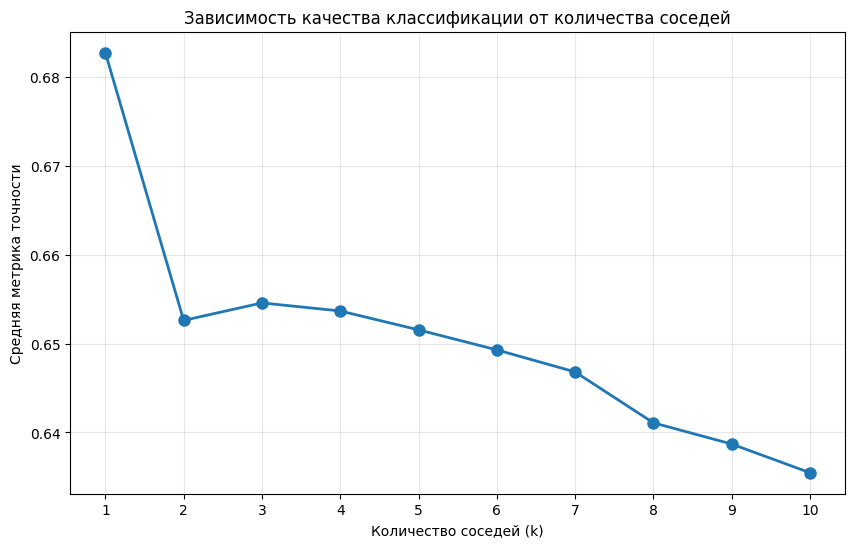

Названия классов:


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [35]:
import matplotlib.pyplot as plt
import numpy as np


n_neighbors_range = range(1, 11)
mean_scores = []

for k in n_neighbors_range:
    k_scores = [res[key] for key in res if key[1] == k]
    mean_score = np.mean(k_scores)
    mean_scores.append(mean_score)


plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_range, mean_scores, marker='o', linewidth=2, markersize=8)
plt.xlabel('Количество соседей (k)')
plt.ylabel('Средняя метрика точности')
plt.title('Зависимость качества классификации от количества соседей')
plt.grid(True, alpha=0.3)
plt.xticks(n_neighbors_range)
plt.show()


data = fetch_20newsgroups()

print("Названия классов:")
data.target_names

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

На графике видно, что наилучшие результаты достигаются при числе соседей k = 1.

А при увеличении числа соседей точность ухудшается. Изучив названия классов, можно заметить, что в датасете есть много классов с похожими тематиками: `talk.politcs`,`sci`,`sport`.

Поэтому в них могут встречаться одни и те же слова. В связи с этим при увеличении числа соседей будут наблюдаться шумы из близких по содержанию классов.

## <font color='DarkOrange'>**Задание 3.4 (кросс-проверка, 1,5 баллa)**</font>

 Оцените точность вашей лучшей модели на тестовой части датасета. Отличается ли оно от качества, полученного на кросс-валидации? Почему? При ответе на поставленные вопросы вам поможет анализ распределений обучающей и тестовой выборок

In [38]:
from sklearn.neighbors import KNeighborsClassifier


best_params = max(res.items(), key=lambda x: x[1])[0]
normalizer_name, best_k, best_metric, best_weight = best_params

print(f"Лучшие параметры из кросс-валидации: {best_params}")
print(f"Точность на кросс-валидации: {res[best_params]}")

# Создаем и обучаем финальную модель с лучшими параметрами
if normalizer_name == 'CountVectorizer':
    vectorizer = CountVectorizer(max_df=0.8, min_df=10, max_features=1000, stop_words='english')
else:
    vectorizer = TfidfVectorizer(max_df=0.8, min_df=10, max_features=1000, stop_words='english')


X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


final_model = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric, weights=best_weight)
final_model.fit(X_train_vec, y_train)


y_pred_test = final_model.predict(X_test_vec)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Точность на тестовой выборке: {test_accuracy}")
print(f"Разница: {test_accuracy - res[best_params]}")

Лучшие параметры из кросс-валидации: ('TfidfVectorizer', 1, 'cosine', 'uniform')
Точность на кросс-валидации: 0.6932994249523278
Точность на тестовой выборке: 0.531465746149761
Разница: -0.16183367880256672


<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Разница между точностью на кросс-валидации и тестовой выборке: -0.16183367880256672 **в худшую** (отрицательную) сторону.

Это может быть связано с тем, что обучающие и тестовые выборки имеют все же **разные распределения**. Поэтому модель, обученная на выборке с одним распределением, может плохо работать на выборке с другим распределением.

# <font color='MediumSeaGreen'>**Бонус [0,5 балла]**</font>

 Вставьте мем, описывающий ваше состоянии после решения данного ноутбука

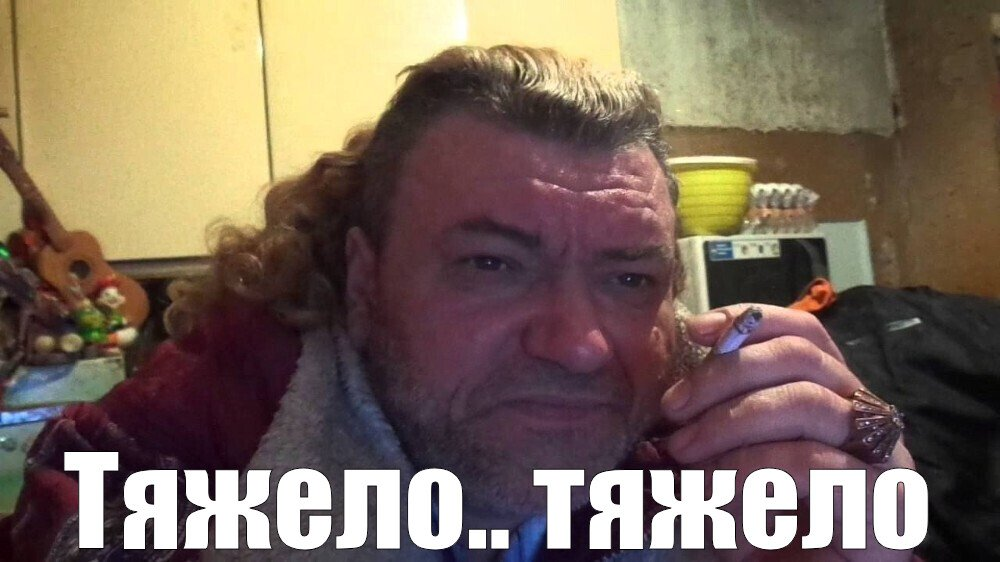